# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

# IMPORTING DATA

In [ ]:
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

print('Top five data:')
print(data.head())

print('\nDataset info:')
print(data.info())

Top five data:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------

# CLEANING DATA

## Remove Irrelevant Values

In [ ]:
del data['no']
del data['Row_Num']

## Convert Data Type

In [ ]:
# First_Transaction column
data['First_Transaction'] = data['First_Transaction'].astype(int)
data['First_Transaction'] = pd.to_datetime(data['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Last_Transaction column
data['Last_Transaction'] = data['Last_Transaction'].astype(int)
data['Last_Transaction'] = pd.to_datetime(data['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Top five data:')
print(data.head())

print('\nDataset info:')
print(data.info())

Top five data:
   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396000000   
1        29531  Sepatu 2014-07-23 01:02:11.493999872   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999808   
4        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000000                     1467681                 22  
1 2018-12-25 11:02:41.269999872                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000064                      722632                 27  
4 2018-11-22 12:53:41.529999872                     1775036                 25  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                      Non-N

First_Transaction and Last_Transaction column are the date of the first and last transaction, but those columns don't have a datetime type, so we changed it into datetime type.


# EXPLORATORY DATA ANALYSIS

## Churn Customer

In [ ]:
# Checking the last transaction in dataset
print(max(data['Last_Transaction']))

# Churn customer classification with boolean
data.loc[data['Last_Transaction'] <= '2018-08-01','is_churn'] = True 
data.loc[data['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('Top five data:')
print(data.head())

print('\nDataset info:')
print(data.info())

2019-02-01 23:57:57.286000128
Top five data:
   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396000000   
1        29531  Sepatu 2014-07-23 01:02:11.493999872   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999808   
4        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  

Dataset info:
<class 'pandas.core.frame.DataFr

Checking customer's last transaction and classification of which customers have churn status and which do not with boolean.
*   TRUE = customer who made their last transaction less than August 1, 2018.
*   FALSE = customer who made their last transaction more than August 1, 2018.

## Customer Acquisition by Year

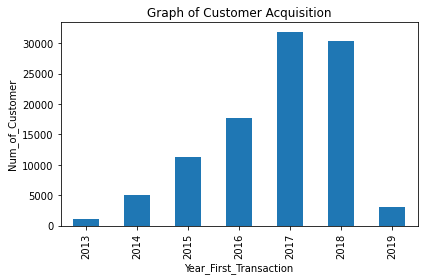

In [ ]:
# First Transaction Column
data['Year_First_Transaction'] = data['First_Transaction'].dt.year
# Last Transaction Column
data['Year_Last_Transaction'] = data['Last_Transaction'].dt.year

data_year = data.groupby(['Year_First_Transaction'])['Customer_ID'].count()
data_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

The highest customer acquisition was in 2017 with more than 30.000 customer 

## Transaction by Year

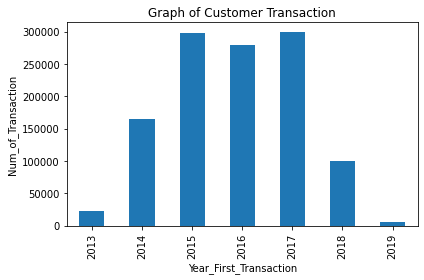

In [ ]:
plt.clf()
data_year = data.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
data_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Customer Transaction')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

The highest customer transaction were in 2015 and 2017 with total transaction more than 300.000

## Average Transaction Amount by Year

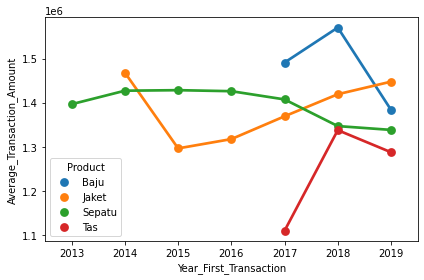

In [ ]:
plt.clf()
sns.pointplot(data = data.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
			  x='Year_First_Transaction',
			  y='Average_Transaction_Amount',
			  hue='Product')
plt.tight_layout()
plt.show()

## Proportion of Churn Customer for Each Product

<Figure size 432x288 with 0 Axes>

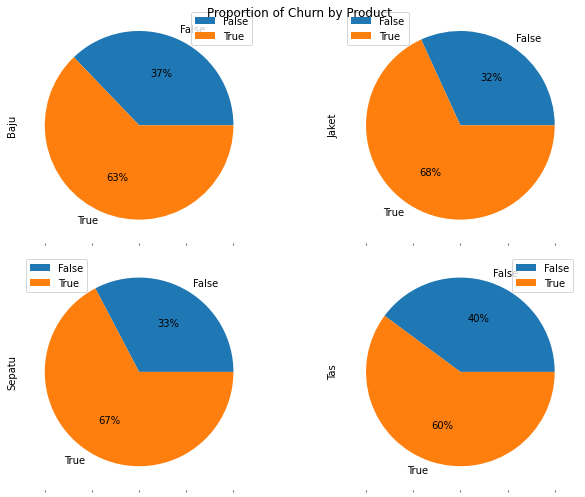

In [ ]:
plt.clf()

# Create data pivots
data_piv = data.pivot_table(index='is_churn',
						columns='Product',
						values='Customer_ID',
						aggfunc='count',
						fill_value=0)

# Proportion of churn by product
plot_product = data_piv.count().sort_values(ascending=False).head(5).index

# Pie chart
data_piv = data_piv.reindex(columns=plot_product)
data_piv.plot.pie(subplots=True,
				figsize=(10, 7),
				layout=(-1, 2),
				autopct='%1.0f%%',
				title='Proportion of Churn by Product')
plt.tight_layout()
plt.show()

## Customer Distribution by Count Transaction

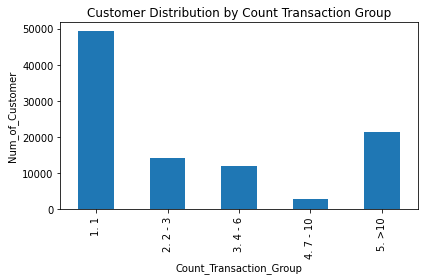

In [ ]:
plt.clf()

# Categorization the number of transactions
def func(row):
	if row['Count_Transaction'] == 1:
		val = '1. 1'
	elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
		val ='2. 2 - 3'
	elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
		val ='3. 4 - 6'
	elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
		val ='4. 7 - 10'
	else:
		val ='5. >10'
	return val

# Adding new column
data['Count_Transaction_Group'] = data.apply(func, axis=1)
data_year = data.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
data_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

It can be seen that almost 50.000 customers only made 1 transaction.

## Customer Distribution by Average Transaction Amount

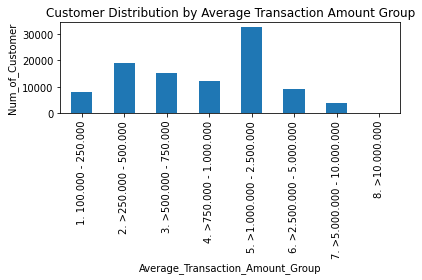

In [ ]:
plt.clf()

# Average Transaction Amount Categories
def f(row):
	if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
		val ='1. 100.000 - 250.000'
	elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
		val ='2. >250.000 - 500.000'
	elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
		val ='3. >500.000 - 750.000'
	elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
		val ='4. >750.000 - 1.000.000'
	elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
		val ='5. >1.000.000 - 2.500.000'
	elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
		val ='6. >2.500.000 - 5.000.000'
	elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
		val ='7. >5.000.000 - 10.000.000'
	else:
		val ='8. >10.000.000'
	return val

# Add new column
data['Average_Transaction_Amount_Group'] = data.apply(f, axis=1)
data_year = data.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
data_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

It can be seen more than 30.000 customer made an average transaction amount around 1.000.000 to 2.500.000

## Feature Column and Target

In [ ]:
# Feature column: Year_Diff
data['Year_Diff']=data['Year_Last_Transaction']-data['Year_First_Transaction']

# feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = data[feature_columns]

# Target variable
y = data['is_churn']

## Split X and Y for Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## Train, Predict, and Evaluate

In [ ]:
# Logistic Regression model initiation
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train, y_train)

# Prediction model
y_pred = logreg.predict(X_test)

# Evaluation model using confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


## Confusion Matrix Visualization

<Figure size 432x288 with 0 Axes>

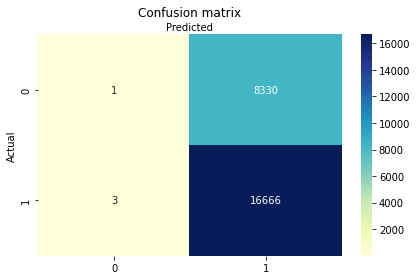

In [ ]:
plt.clf()

# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

The result is telling us that we have 1+16666 correct prediction and 3+8330 incorrect prediction.

## Accuracy, Presicion, and Recall

In [ ]:
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668


From the results above, we can say that:
*   66.7% the model correctly performs the overall classification
*   66.7% the model good at predicting a specific category
*   66.7% the model able to detect a spesific category



